# Análisis Exploratorio de Ventas de Autos

El objetivo de este proyecto es realizar un análisis exploratorio de un conjunto de datos sobre ventas de automóviles en Estados Unidos durante los años 2022 y 2023, con el fin de identificar patrones, conocer las características más comunes de los vehículos vendidos y visualizar posibles tendencias del mercado.

Este análisis se enfoca únicamente en la exploración y visualización de datos, sin incluir modelos predictivos, ya que el conjunto de datos no cuenta con una variable objetivo adecuada para ese propósito.

Este tipo de estudio puede resultar valioso para áreas como ventas, marketing o inteligencia de negocios dentro de la industria automotriz.

**Dataset**: [Car Sales Report - Kaggle](https://www.kaggle.com/datasets/missionjee/car-sales-report)  
**Industria**: Automotriz  
**Fecha**: Mayo 2025  
**Autor**: Miguel Angel Pérez

## Inicialización

En esta sección se importan las librerías necesarias para la carga, manipulación y visualización de datos.

In [2]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carga de Datos

En esta sección se realiza la carga del archivo CSV y una revisión rápida para confirmar que los datos se han importado correctamente.

In [3]:
# Cargar el archivo 
df = pd.read_csv('../datasets/car_data.csv')

In [4]:
# Comprobar que los datos se cargaron correctamente
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


## Exploración Inicial

En esta sección se realiza una exploración general del dataset, revisando sus dimensiones, tipos de datos y la presencia de valores nulos.

In [5]:
# Inspeccionar los tipos de datos y la cantidad de valores no nulos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [6]:
# Verificar las dimensiones del DataFrame
df.shape

(23906, 16)

In [7]:
# Imprimir una muestra de los datos
df.sample(5, random_state=1234)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7788,C_CND_007789,11/8/2022,Mario,Female,1000000,Saab-Belle Dodge,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Black,28000,60504-7114,Hatchback,8512174,Scottsdale
18966,C_CND_018967,9/26/2023,Camille,Male,621000,Tri-State Mack Inc,Ford,F-Series,Overhead Camshaft,Manual,Pale White,14000,85257-3102,Passenger,7378264,Scottsdale
16106,C_CND_016107,7/22/2023,Halima,Male,2010000,Ryder Truck Rental and Leasing,Dodge,Dakota,Overhead Camshaft,Manual,Pale White,12001,06457-3834,Sedan,8205475,Middletown
4460,C_CND_004461,8/9/2022,Zion,Male,526000,U-Haul CO,Honda,Accord,DoubleÂ Overhead Camshaft,Auto,Pale White,19001,78758-7841,Sedan,7142125,Austin
16145,C_CND_016146,7/22/2023,Max,Female,805000,New Castle Ford Lincoln Mercury,Chrysler,Concorde,DoubleÂ Overhead Camshaft,Auto,Pale White,46000,60504-7114,SUV,8732478,Aurora


In [8]:
# Obtener estadísticas descriptivas de las columnas numéricas
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [9]:
# Verificar la cantidad de filas duplicadas
df.duplicated().sum()

np.int64(0)

In [10]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [11]:
# Verificar la cantidad de valores únicos por columna
df.nunique()

Car_id           23906
Date               612
Customer Name     3021
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

**Análisis de resultados**

El DataFrame contiene información sobre las ventas de vehículos realizadas en Estados Unidos entre los años 2022 y 2023. Está compuesto por 23,906 filas y 16 columnas, que incluyen datos como la fecha de venta, información del cliente, características del vehículo, precio y detalles del distribuidor.

Al revisar la información, se puede corroborar que cada fila representa un vehículo vendido. Con 23,906 registros y solo 3,021 nombres de cliente únicos, se concluye que varios clientes realizaron más de una compra durante el periodo.

Cabe señalar que solo se encontró una fila con un valor nulo en la columna "Customer Name", lo cual no representa un problema significativo para el análisis. Además, no se detectaron filas duplicadas.

Para mejorar la legibilidad y facilitar el análisis posterior, se realizarán los siguientes ajustes:

- Renombrar las columnas al estilo snake_case.
- Convertir la columna Date al tipo de dato datetime.
- Convertir la columna Phone al tipo object.

## Limpieza y Transformación de Datos

En esta sección se aplican los primeros pasos de limpieza y transformación del dataset, con el objetivo de mejorar su legibilidad, corregir tipos de datos y prepararlo para el análisis exploratorio.

In [12]:
# Renombrar las columnas utilizando el estilo snake_case
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
)

In [13]:
# Renombrar la columna "price_($)" por "price"
df.rename(columns={'price_($)': 'price'}, inplace=True)


In [14]:
# Verificar los nombres de las columnas
df.columns

Index(['car_id', 'date', 'customer_name', 'gender', 'annual_income',
       'dealer_name', 'company', 'model', 'engine', 'transmission', 'color',
       'price', 'dealer_no', 'body_style', 'phone', 'dealer_region'],
      dtype='object')

In [15]:
# Convertir la columna 'date' al tipo de dato datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [16]:
# Convertir la columna 'phone' a tipo object
df['phone'] = df['phone'].astype('object')

In [17]:
# Verificar los cambios en los tipos de datos
df.dtypes

car_id                   object
date             datetime64[ns]
customer_name            object
gender                   object
annual_income             int64
dealer_name              object
company                  object
model                    object
engine                   object
transmission             object
color                    object
price                     int64
dealer_no                object
body_style               object
phone                    object
dealer_region            object
dtype: object

In [18]:
# Imprimir una muestra de los datos
df.sample(5, random_state=1234)

,car_id,date,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,dealer_no,body_style,phone,dealer_region
7788,C_CND_007789,2022-11-08,Mario,Female,1000000,Saab-Belle Dodge,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Black,28000,60504-7114,Hatchback,8512174,Scottsdale
18966,C_CND_018967,2023-09-26,Camille,Male,621000,Tri-State Mack Inc,Ford,F-Series,Overhead Camshaft,Manual,Pale White,14000,85257-3102,Passenger,7378264,Scottsdale
16106,C_CND_016107,2023-07-22,Halima,Male,2010000,Ryder Truck Rental and Leasing,Dodge,Dakota,Overhead Camshaft,Manual,Pale White,12001,06457-3834,Sedan,8205475,Middletown
4460,C_CND_004461,2022-08-09,Zion,Male,526000,U-Haul CO,Honda,Accord,DoubleÂ Overhead Camshaft,Auto,Pale White,19001,78758-7841,Sedan,7142125,Austin
16145,C_CND_016146,2023-07-22,Max,Female,805000,New Castle Ford Lincoln Mercury,Chrysler,Concorde,DoubleÂ Overhead Camshaft,Auto,Pale White,46000,60504-7114,SUV,8732478,Aurora


In [19]:
# Confirmar si existen valores nulos tras las conversiones
df.isnull().sum()

car_id           0
date             0
customer_name    1
gender           0
annual_income    0
dealer_name      0
company          0
model            0
engine           0
transmission     0
color            0
price            0
dealer_no        0
body_style       0
phone            0
dealer_region    0
dtype: int64

### Resumen de limpieza y transformación de los datos

Se realizaron las siguientes transformaciones para mejorar la legibilidad del dataset y asegurar la correcta interpretación de los datos:

- Se renombraron todas las columnas al estilo 'snake_case' para estandarizar su formato.
- Se convirtió la columna 'date' al tipo de dato 'datetime', lo que permitirá un análisis adecuado por fechas.
- Se cambió el tipo de dato de la columna 'phone' a 'object', ya que representa texto y no valores numéricos.

Tras estos cambios, se verificó que no se generaron nuevos valores nulos. El único valor faltante en el dataset continúa siendo el ya identificado previamente en la columna 'customer_name', y no representa un problema para el análisis.

## Análisis Exploratorio de Datos (EDA)

En esta sección se realiza un análisis exploratorio del conjunto de datos con el objetivo de identificar patrones relevantes en las ventas de automóviles. Se analiza la distribución de variables individuales, así como relaciones entre diferentes características de los autos, los clientes y los distribuidores.

### 1. Distribución de variables categóricas

In [20]:
# Configuración de estilo para gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [21]:
# Lista de columnas categóricas a analizar
cat_cols = ['company', 'model', 'transmission', 'color', 'body_style', 'dealer_region']

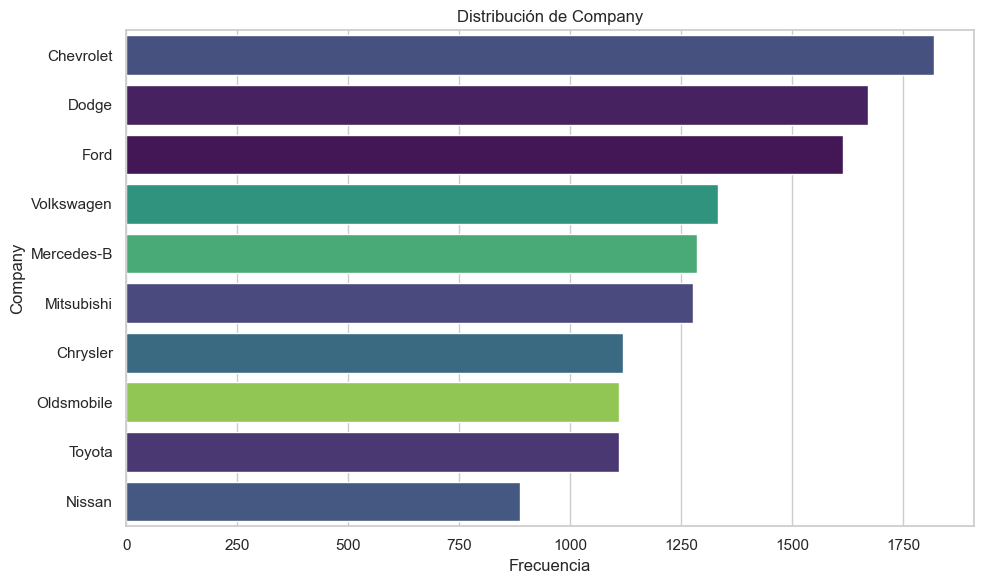

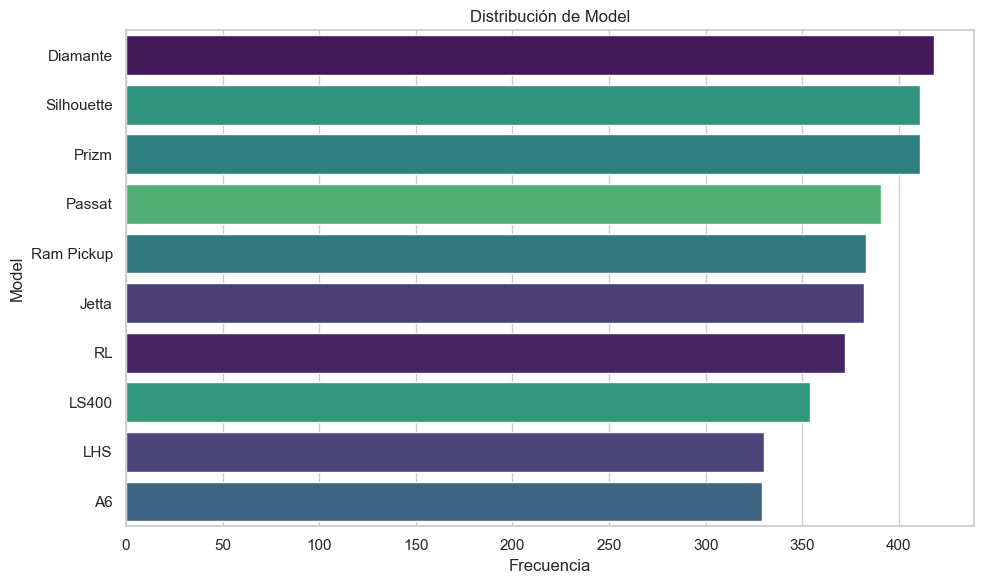

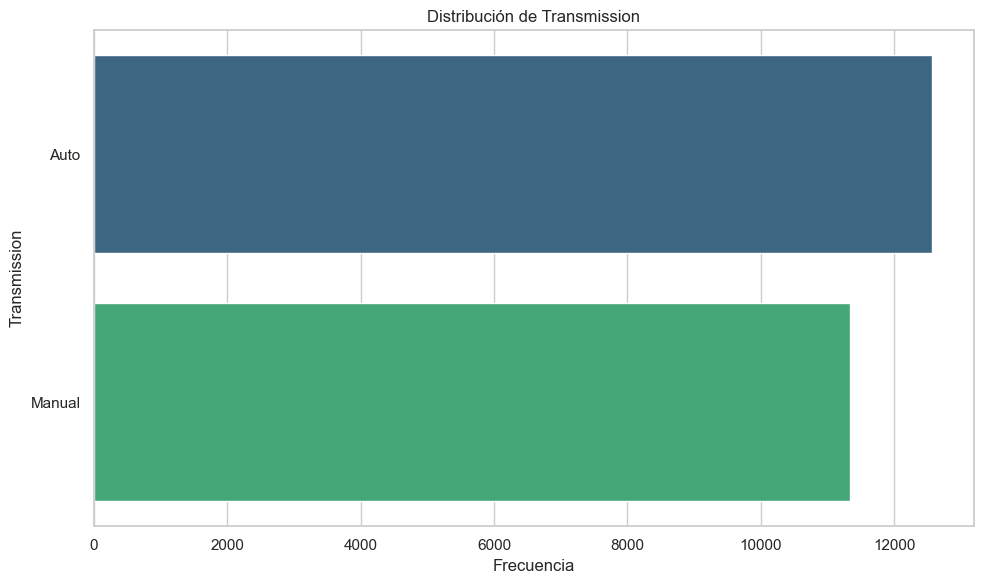

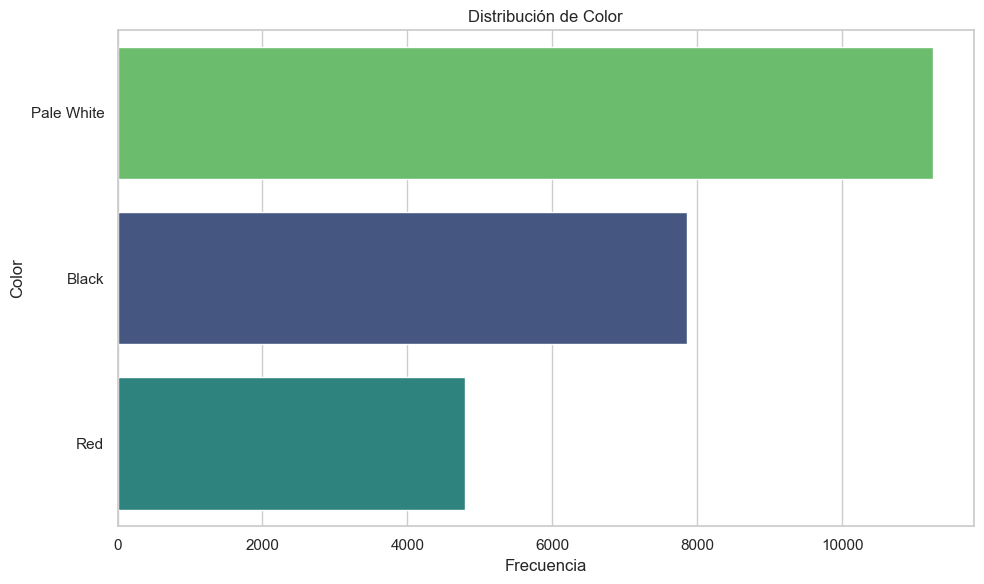

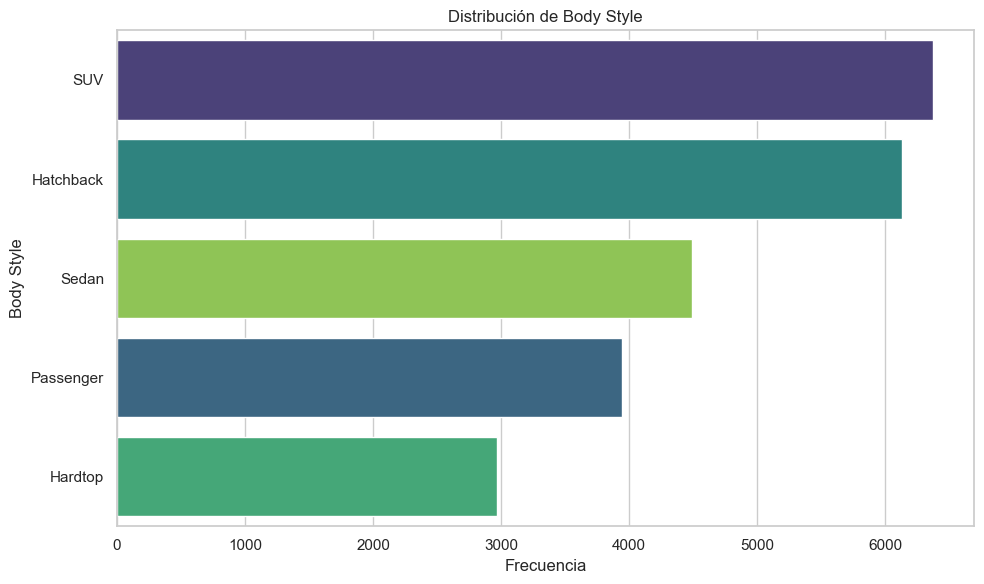

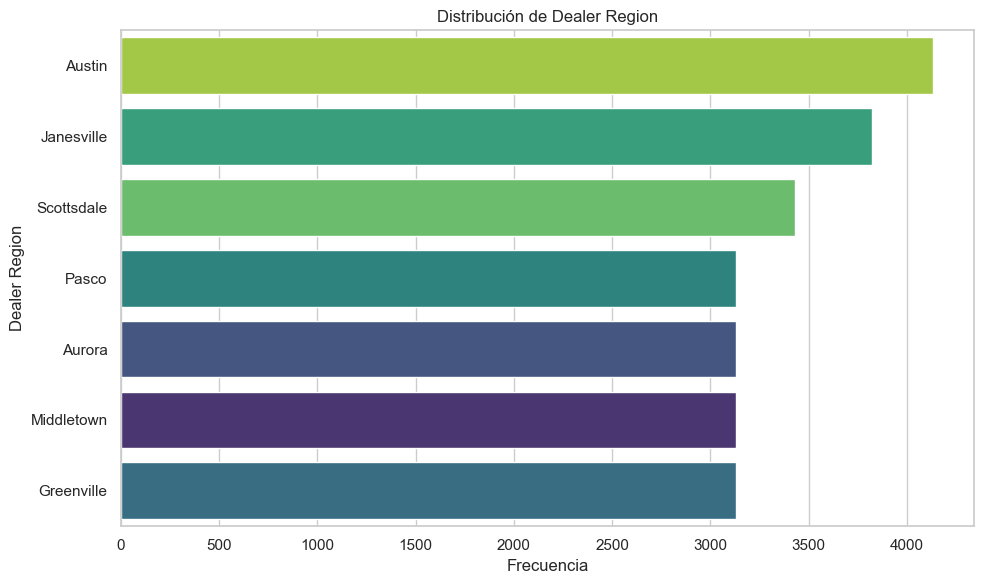

In [22]:
# Generar gráficos de barras para cada variable categórica
for col in cat_cols:
    plt.figure()
    order = df[col].value_counts().head(10).index
    sns.countplot(data=df, y=col, order=order, palette='viridis', hue=col, legend=False)
    plt.title(f'Distribución de {col.replace("_", " ").title()}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col.replace("_", " ").title())
    plt.tight_layout()
    plt.show()

**Análisis de Resultados**

Los gráficos de barras de las variables categóricas destacan los siguientes hallazgos:

- **Compañía de vehículos más vendida:** Chevrolet lidera en ventas con más de 1,750 unidades, seguida por Dodge y Ford, con más de 1,500 unidades cada una. Este resultado es esperable considerando que las tres son marcas estadounidenses, y el mercado norteamericano suele mostrar preferencia por marcas nacionales. Este hallazgo será relevante ante la creciente entrada de nuevas marcas chinas al mercado.

- **Modelos más populares:** Aunque no hay una diferencia significativa en las unidades vendidas por modelo, el Mitsubishi Diamante encabeza la lista con más de 400 ventas, seguido por el Oldsmobile Silhouette y el Chevrolet Prizm. Llama la atención que dos de estos tres modelos no pertenecen a las marcas más vendidas y son modelos descontinuados, lo cual sugiere que, además de la marca, es importante analizar el comportamiento de venta a nivel de modelo para tomar decisiones estratégicas en ventas y distribución.

- **Tipo de transmisión:** Aunque la diferencia no es drástica, se observa una clara preferencia por la transmisión automática, con más de 12,000 unidades vendidas.

- **Colores más elegidos:** Los colores más vendidos reflejan una tendencia común en el mercado automotriz: Pale White lidera con más de 11,000 unidades, seguido por Black con casi 8,000. Ambos colores están asociados a una apariencia neutra o elegante. Red, típicamente relacionado con autos deportivos o juveniles, ocupa el tercer lugar con más de 4,000 unidades.

- **Estilo de carrocería predominante:** Los tipos de vehículos más vendidos son SUV y Hatchback, con más de 6,000 unidades cada uno. Esto puede indicar una dualidad de preferencias entre vehículos familiares y opciones más compactas o juveniles. Este insight puede ser útil para definir el perfil demográfico de los clientes y orientar la oferta comercial.

- **Regiones con mayor actividad de ventas:** Las ventas se concentran en regiones como Austin, Janesville y Scottsdale. Aunque Austin y Scottsdale están en el sur de Estados Unidos, Janesville se ubica en el norte, lo que sugiere que no hay un patrón geográfico uniforme. Además, Janesville y Scottsdale son ciudades relativamente pequeñas comparadas con Austin. Esta distribución regional podría ser un punto clave para análisis más profundos o segmentación de campañas.

Estos patrones pueden ser útiles para orientar estrategias comerciales, optimizar el inventario por zona, o enfocar campañas de marketing según las preferencias del mercado y la demanda regional.

### 2. Análisis de variables numéricas

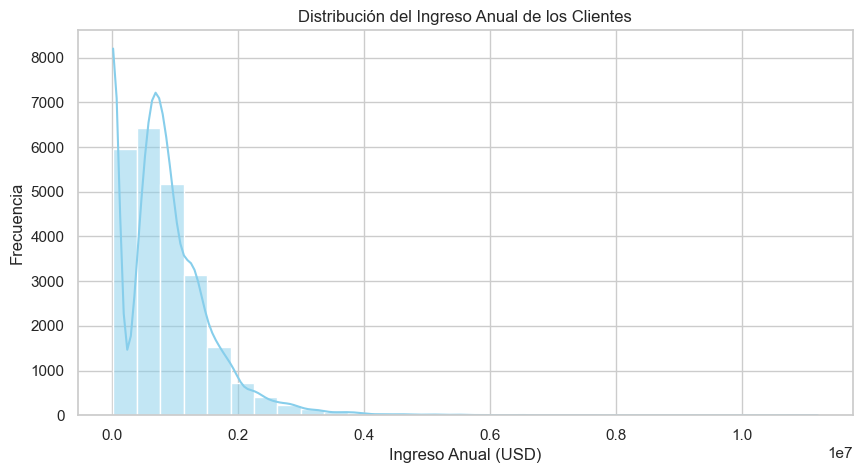

In [23]:
# Visualizar la distribución del ingreso anual de los clientes
plt.figure(figsize=(10, 5))
sns.histplot(df['annual_income'], bins=30, kde=True, color='skyblue')
plt.title('Distribución del Ingreso Anual de los Clientes')
plt.xlabel('Ingreso Anual (USD)')
plt.ylabel('Frecuencia')
plt.show()

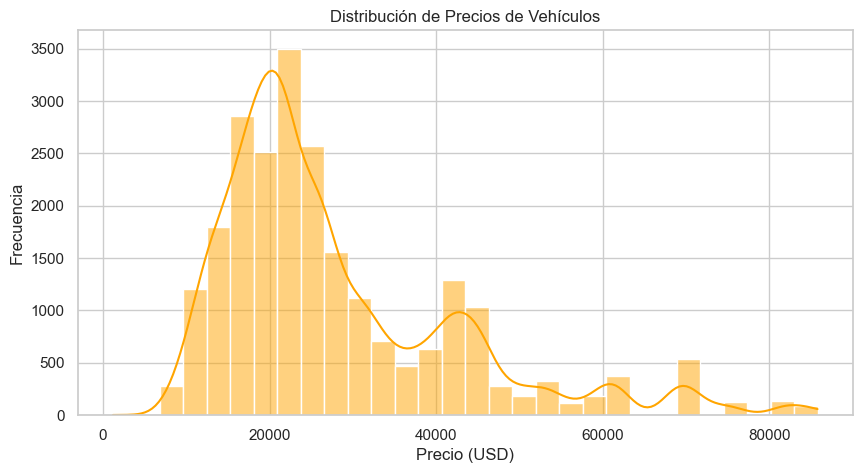

In [24]:
# Visualizar la distribución de precios de los vehículos vendidos
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True, color='orange')
plt.title('Distribución de Precios de Vehículos')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

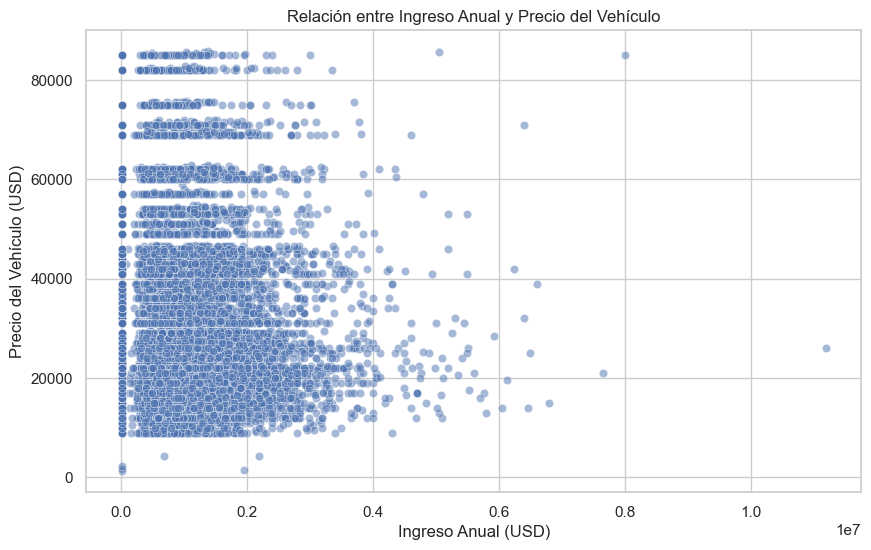

In [25]:
# Analizar la relación entre el ingreso anual del cliente y el precio del vehículo comprado
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='annual_income', y='price', alpha=0.5)
plt.title('Relación entre Ingreso Anual y Precio del Vehículo')
plt.xlabel('Ingreso Anual (USD)')
plt.ylabel('Precio del Vehículo (USD)')
plt.show()

**Análisis de Resultados**

Los gráficos de distribución y dispersión de las variables numéricas permiten identificar los siguientes patrones:

- **Ingreso anual de los clientes:** La gran mayoría de los compradores tienen ingresos anuales inferiores a los 2 millones de dólares, con un pico de más de 6,000 registros entre los 0 y 1 millón. Esto sugiere que la mayoría del mercado está compuesto por personas de ingresos medios o medio-altos.

- **Precios de los vehículos vendidos:** Los precios se concentran en torno a los 20,000 USD, con más de 3,500 unidades en ese rango. Llama la atención un segundo pico, con más de 1,000 vehículos vendidos a precios cercanos a los 4,000 USD. Además, aunque en menor proporción, se registran compras de vehículos de más de 80,000 USD, lo que indica la presencia de un segmento de lujo o alta gama.

- **Relación entre ingreso anual y precio del vehículo:** Se observa una alta densidad de clientes con ingresos por debajo de los 2 millones de dólares que compran vehículos en el rango de 10,000 a 50,000 USD. También se identifican casos atípicos: un cliente con ingresos de 8 millones adquiriendo un vehículo de más de 80,000 USD, y otro con casi 12 millones comprando uno de menos de 30,000 USD.

Estos hallazgos sugieren que, si bien existe una relación general entre mayores ingresos y vehículos de mayor precio, también influyen otros factores como estilo de vida, decisiones financieras personales o estrategias fiscales. Además, estos patrones pueden ser útiles para perfilar segmentos de clientes y diseñar estrategias diferenciadas de ventas, financiamiento y marketing en función del nivel de ingreso.

### 3. Relaciones entre variables clave

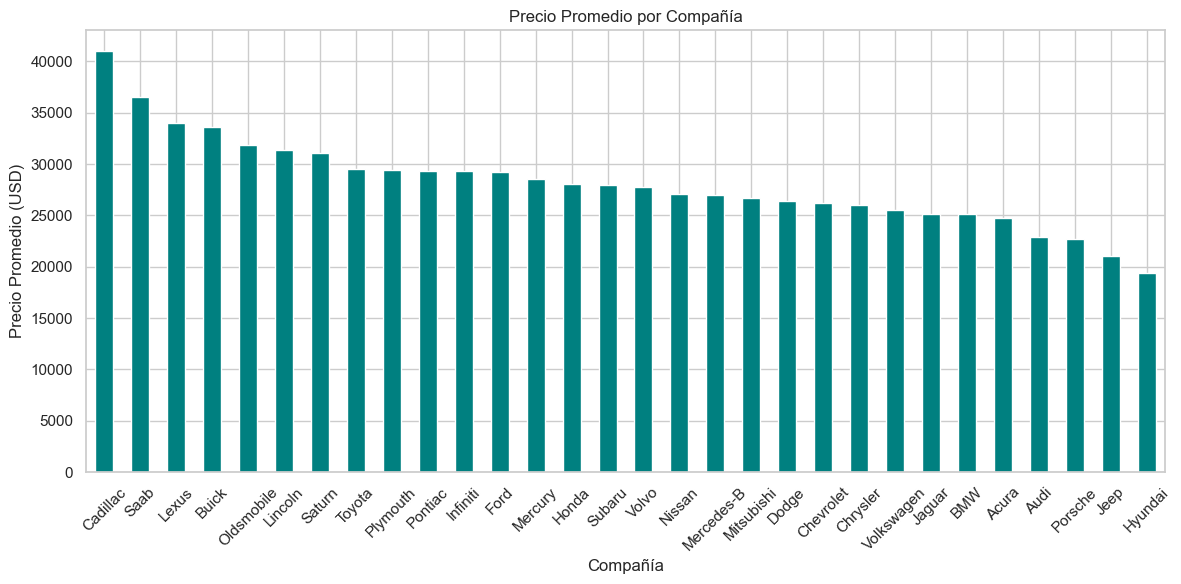

In [26]:
# Visualizar el precio promedio de los vehículos vendidos por compañía
avg_price_by_company = df.groupby('company')['price'].mean().sort_values(ascending=False)
avg_price_by_company.plot(kind='bar', figsize=(12,6), color='teal')
plt.title('Precio Promedio por Compañía')
plt.xlabel('Compañía')
plt.ylabel('Precio Promedio (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

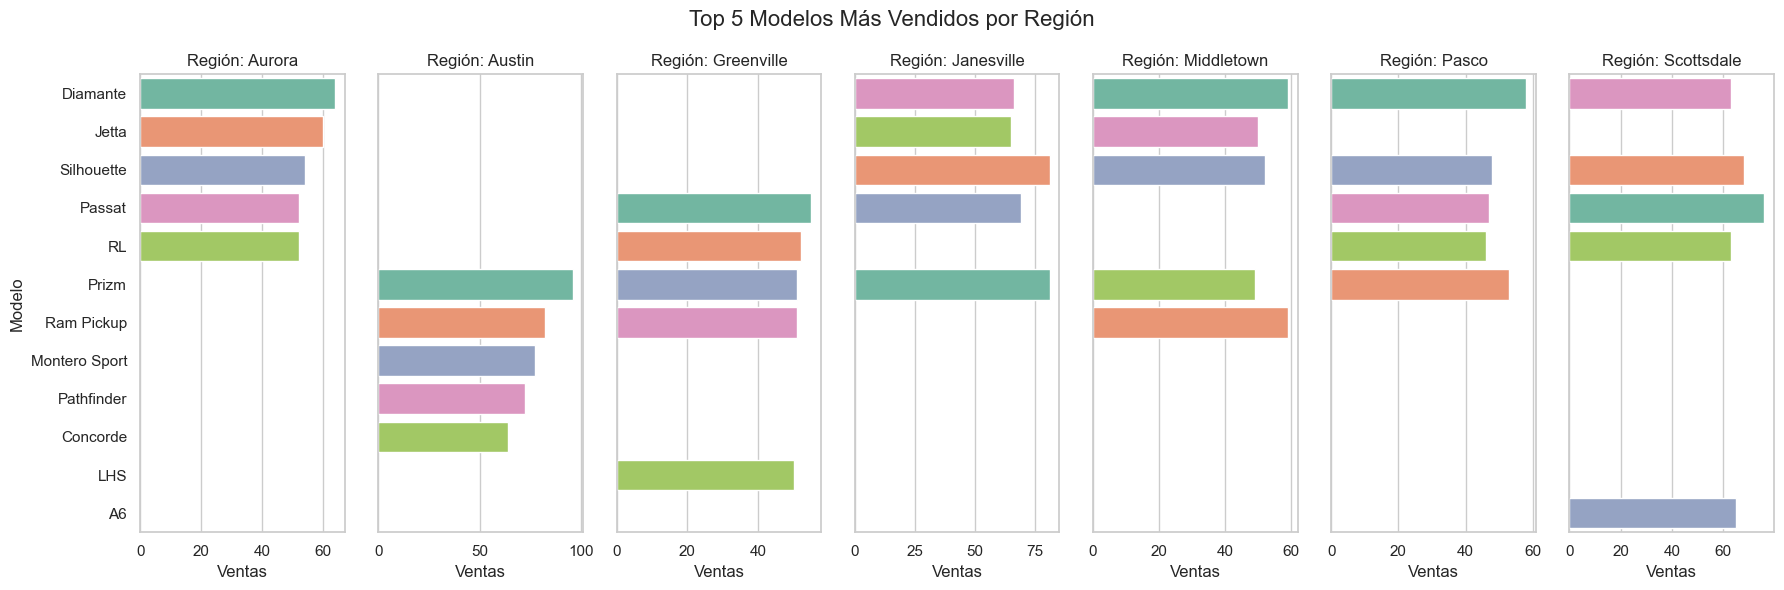

In [27]:
# Visualizar los 5 modelos más vendidos por región
top_models_by_region = df.groupby(['dealer_region', 'model']).size().reset_index(name='ventas')
top_models_by_region = top_models_by_region.sort_values(['dealer_region', 'ventas'], ascending=[True, False])
top5_per_region = top_models_by_region.groupby('dealer_region').head(5)

regions = top5_per_region['dealer_region'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(regions), figsize=(18, 6), sharey=True)

for i, region in enumerate(regions):
    region_data = top5_per_region[top5_per_region['dealer_region'] == region]
    sns.barplot(
        data=region_data, 
        x='ventas', 
        y='model', 
        hue='model', 
        ax=axes[i], 
        palette='Set2',
        dodge=False
    )
    axes[i].set_title(f'Región: {region}')
    axes[i].set_xlabel('Ventas')
    axes[i].set_ylabel('Modelo')

    # Solo remover leyenda si existe
    leg = axes[i].get_legend()
    if leg is not None:
        leg.remove()

fig.suptitle('Top 5 Modelos Más Vendidos por Región', fontsize=16)
plt.tight_layout()
plt.show()

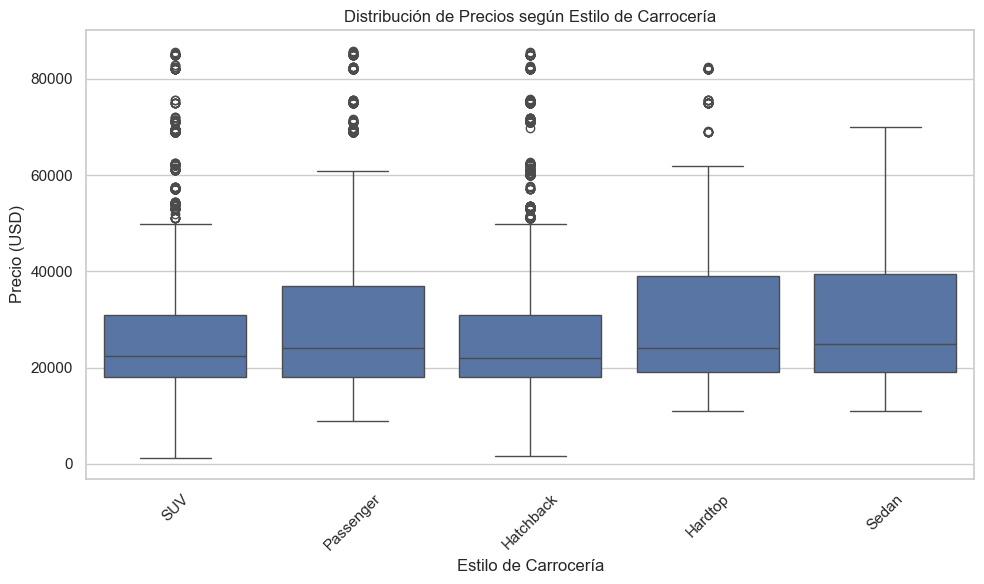

In [28]:
# Comparar la distribución de precios según el estilo de carrocería
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='body_style', y='price')
plt.title('Distribución de Precios según Estilo de Carrocería')
plt.xlabel('Estilo de Carrocería')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Análisis de Resultados**

El análisis realizado mediante diversas visualizaciones, ha ayudado a identificar patrones útiles que podrían ser utilizados en diferentes estrategias comerciales y de segmentación.

- **Precio promedio por compañía:** Las compañías muestran diferencias notables en sus precios promedio. Cadillac y Saab destacan con valores superiores a los $35,000 USD, lo que sugiere un enfoque en vehículos de alta gama. En contraste, marcas como Porsche, Audi, Jeep y Hyundai presentan promedios por debajo de los $25,000 USD, lo que puede reflejar estrategias orientadas a modelos más accesibles o versiones de entrada. Esta variabilidad refuerza el distinto posicionamiento de marca entre fabricantes.

- **Modelos más vendidos por región:** Se observa una fuerte variación regional en las preferencias de modelos. Algunos, como “Jetta” y “Silhouette”, figuran entre los más vendidos en múltiples regiones, lo que indica una popularidad extendida. Otros, como el “Prizm” o el “Diamante”, muestran un liderazgo más localizado. La ausencia de un modelo dominante a nivel nacional resalta la importancia de adaptar las estrategias de venta a características geográficas y demográficas específicas.

- **Distribución de precios por estilo de carrocería:** Estilos como SUV y Passenger presentan una amplia dispersión de precios y numerosos valores atípicos, indicando la presencia de versiones tanto económicas como de lujo. En cambio, Hatchback, Hardtop y Sedan muestran precios más concentrados, con menor variabilidad y un enfoque más claro hacia el mercado masivo. Esta diferencia sugiere una segmentación natural en el mercado según tipo de carrocería.

Estos resultados no solo reflejan la diversidad del mercado automotriz, sino que también abren oportunidades para una oferta más personalizada. Comprender qué marcas, modelos o estilos resuenan en cada segmento permite alinear mejor las decisiones comerciales con las expectativas reales de los clientes.


### 4. Análisis temporal de las ventas

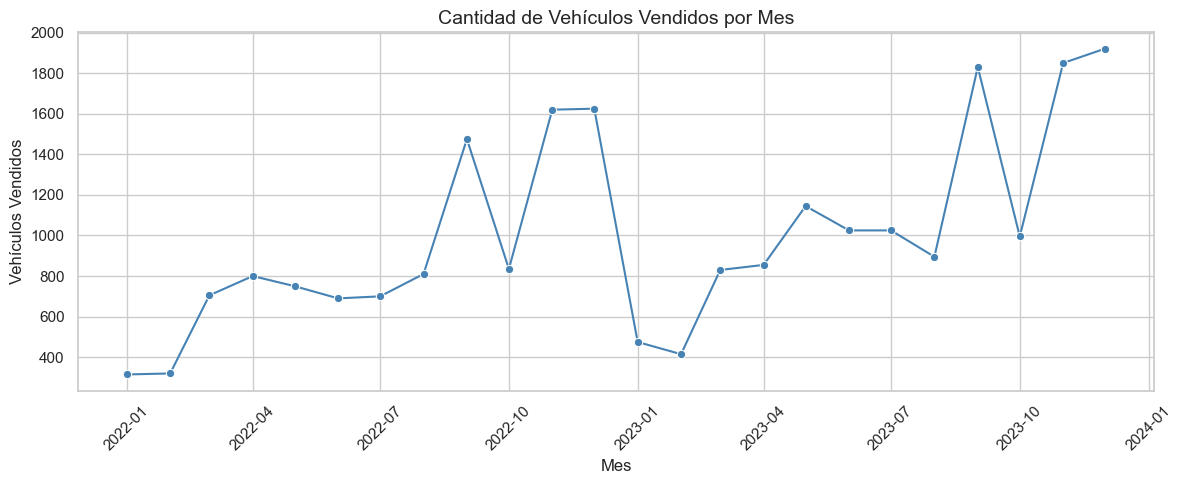

In [29]:
# Crear una columna de mes
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()

# Agrupar por cantidad de vehículos vendidos por mes
monthly_sales = df.groupby('month').size().reset_index(name='vehicles_sold')

# Definir estilo de la gráfica
sns.set(style="whitegrid")

# Visualizar la cantidad de vehículos vendidos por mes
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='month', y='vehicles_sold', marker='o', color='steelblue')
plt.title('Cantidad de Vehículos Vendidos por Mes', fontsize=14)
plt.ylabel('Vehículos Vendidos')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

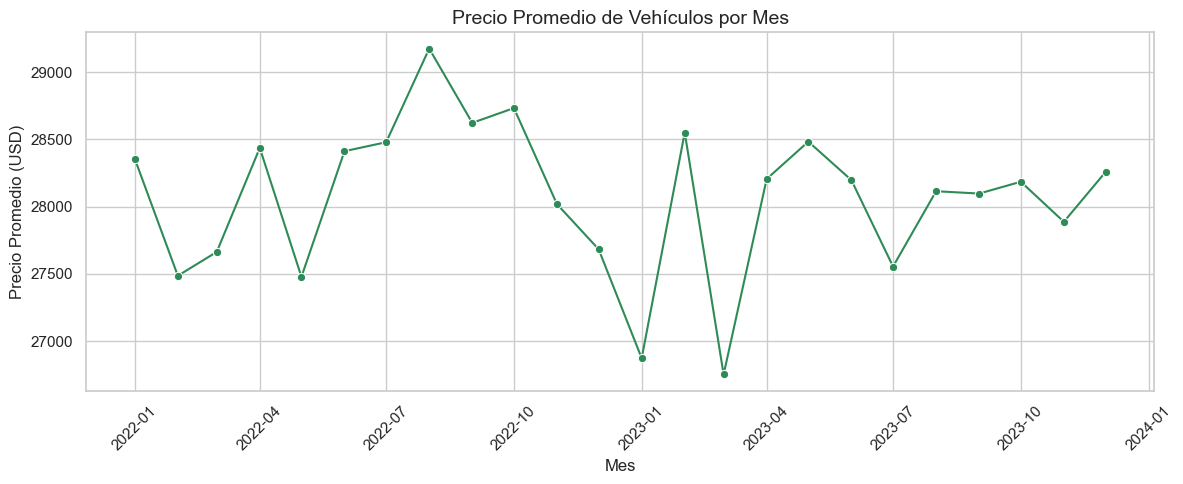

In [30]:
# Agrupar precio promedio por mes
monthly_avg_price = df.groupby('month')['price'].mean().reset_index()

# Visualizar el precio promedio por mes
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_avg_price, x='month', y='price', marker='o', color='seagreen')
plt.title('Precio Promedio de Vehículos por Mes', fontsize=14)
plt.ylabel('Precio Promedio (USD)')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Análisis de Resultados**

Con el objetivo de identificar patrones estacionales y tendencias en el comportamiento del mercado automotriz, se analizaron dos aspectos: la cantidad de vehículos vendidos por mes y la evolución del precio promedio mensual. Las gráficas de líneas permitieron visualizar cómo se comportan estas variables a lo largo del tiempo.

- **Tendencia mensual de ventas**

    La gráfica de líneas que muestra la cantidad de vehículos vendidos por mes revela una tendencia ascendente a lo largo del tiempo. Este crecimiento constante podría estar relacionado con una mayor capacidad de compra por parte de los consumidores, ofertas en modelos anteriores o una mayor necesidad de transporte personal.

    También se observan picos de venta en los meses de agosto, septiembre, noviembre y diciembre, que podrían deberse a incentivos financieros de fin de año o promociones por el lanzamiento de nuevos modelos. En contraste, las caídas más notables ocurren en junio, octubre y enero, posiblemente por factores estacionales como vacaciones, regreso a clases o gastos post-navideños.

- **Variación del precio promedio mensual**

    En cuanto al precio promedio mensual de los vehículos vendidos, la gráfica muestra una tendencia relativamente estable, con algunas variaciones puntuales. Destacan un pico en agosto de 2022 y caídas pronunciadas en enero y marzo de 2023, pero en general, los precios fluctúan de forma leve, sin un patrón estacional claro.

    Estos resultados sugieren que, aunque las ventas presentan estacionalidades marcadas, los precios se han mantenido más constantes. Sin embargo, analizar un periodo más extenso podría revelar ciclos de precios más definidos que permitan ajustar mejor la estrategia comercial.

Este análisis temporal proporciona información valiosa para áreas como ventas, marketing y planeación de inventario. Identificar los meses con mayor y menor demanda permite a las empresas planificar campañas promocionales, ajustar el stock disponible y anticipar necesidades logísticas. Asimismo, comprender el comportamiento de los precios puede ser útil para diseñar estrategias de precios más competitivas y alineadas con el mercado en cada momento del año.


### Resumen del Análisis Exploratorio de Datos

Durante el análisis exploratorio se identificaron varias tendencias interesantes sobre el mercado automotriz. Marcas como Chevrolet, Dodge y Ford lideran en ventas, con una clara preferencia por transmisiones automáticas, colores neutros como blanco y negro, y estilos de carrocería tipo SUV y Hatchback. También se notó que las ventas están concentradas en algunas ciudades específicas, sin un patrón regional definido.

En cuanto a los datos numéricos, la mayoría de los clientes tiene ingresos anuales menores a 2 millones de dólares y suele adquirir vehículos entre los 10,000 y 30,000 USD. Aunque existe cierta relación entre el nivel de ingreso y el precio del auto, también hay casos que se salen de lo esperado. Por otro lado, al analizar las ventas por mes, se observa una tendencia general al alza con algunos picos estacionales, mientras que los precios se han mantenido relativamente estables con pocas variaciones.

En conjunto, estos hallazgos nos ayudan a entender mejor el perfil de los compradores y sus preferencias, lo cual será clave para diseñar estrategias más acertadas en áreas como marketing, ventas o planificación comercial.

## Conclusión

Este análisis exploratorio permitió conocer mejor el comportamiento de los clientes y el mercado automotriz. Se identificaron patrones clave sobre qué marcas, modelos y estilos de vehículos son más populares, así como las preferencias por tipo de transmisión, color y rangos de precio según el nivel de ingreso. También se detectaron variaciones regionales y estacionales que pueden aprovecharse en campañas comerciales o decisiones de inventario.

Estos hallazgos pueden ser especialmente útiles para equipos de marketing, ventas, finanzas o planeación comercial, ya que permiten adaptar estrategias según las preferencias del cliente y la dinámica del mercado. Por ejemplo, conocer los meses de mayor demanda o los segmentos de ingreso más activos puede ayudar a ajustar promociones, stock disponible o condiciones de financiamiento.

Sin embargo, el análisis también tuvo sus límites. El dataset no incluye información detallada sobre la fecha exacta de venta, canales de adquisición, ni variables más específicas del cliente como edad, género o historial crediticio. Contar con esos datos permitiría una segmentación mucho más precisa.

En base a los resultados, se recomienda:

- Personalizar las estrategias de venta por región y estilo de vehículo.

- Aprovechar los meses con mayor volumen para lanzar promociones específicas.

- Revisar oportunidades para modelos con alta demanda pero menor presencia de marca.

- Considerar incorporar nuevas fuentes de datos para profundizar en el perfil del cliente y su comportamiento de compra.

En resumen, este análisis ofrece una base sólida para tomar decisiones más informadas y enfocadas en las verdaderas necesidades del mercado.